# Timeseries

This notebook shows how to use the timeseries diagnostic. Here we focus on the `Timeseries` for the single model evaluation and the `PlotTimeseries` for the multi model plots.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua.diagnostics.timeseries import Timeseries

/LUMI_TYKKY_L60Yfbf/miniconda/envs/env1/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


We set the `Timeseries` for a model and ERA5, with two different class instances.

In [3]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}
obs_dict = {'catalog': 'obs',
            'model': 'ERA5',
            'exp': 'era5',
            'source': 'monthly',
            'std_startdate': '1990-01-01',
            'std_enddate': '1999-12-31'}
common_dict = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'loglevel': 'info'}

In [4]:
ts_dataset = Timeseries(**dataset_dict, **common_dict)

In [5]:
run_dict = {'var': '2t',
            'units': 'degC'}

In [6]:
ts_dataset.run(**run_dict)

2025-03-29 16:47:23 :: BaseTimeseries :: INFO     -> Running Timeseries for 2t
2025-03-29 16:47:23 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-03-29 16:47:24 :: Reader :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-03-29 16:47:24 :: Reader :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-03-29 16:47:24 :: Reader :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-03-29 16:47:24 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-03-29 16:47:24 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-03-29 16:47:24 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-03-29 16:48:00 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-03-29 16:48:00 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-03-29 16:48:00 :: Regridder :: INFO     -> Grid name: lon-lat
2025-03-29 1

In [7]:
ts_obs = Timeseries(**obs_dict, **common_dict)
ts_obs.run(**run_dict, std=True)

2025-03-29 16:48:02 :: BaseTimeseries :: INFO     -> Running Timeseries for 2t
2025-03-29 16:48:02 :: ConfigPath :: INFO     -> ERA5_era5_monthly triplet found in in obs!
2025-03-29 16:48:02 :: Reader :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-03-29 16:48:02 :: Reader :: INFO     -> Fix names in metadata is ERA5-destine-v1
2025-03-29 16:48:02 :: Reader :: INFO     -> Fix names ERA5-destine-v1 found in fixes files
2025-03-29 16:48:03 :: Reader :: INFO     -> Grid metadata is era5-r025s
2025-03-29 16:48:03 :: Regridder :: INFO     -> Grid name: era5-r025s
2025-03-29 16:48:03 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_era5-r025s.nc.
2025-03-29 16:48:03 :: Reader :: INFO     -> Retrieving variables: ['2t']
2025-03-29 16:48:03 :: Reader :: INFO     -> Variables to be fixed: {'2t': {'source': [167, 228004, '2t', 'mean2t', 'avg_2t', 'T2M', 'tas'], 'grib': 167}}
2025-03-29 16:48:03 :: Reader :: INFO 

In [8]:
from aqua.diagnostics.timeseries import PlotTimeseries

In [9]:
ts_obs.monthly

<xarray.DataArray '2t' (time: 120)> Size: 960B
dask.array<where, shape=(120,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 960B 1990-01-15 1990-02-15 ... 1999-12-15
Attributes: (12/21)
    long_name:       2 metre temperature
    units:           degC
    code:            167
    table:           128
    history:         \n2025-03-29 16:48:03 AQUA💧: Variable renamed 2t from T2...
    paramId:         167
    ...              ...
    diagnostic:      timeseries
    model:           ERA5
    experiment:      era5
    time_precision:  ymd
    catalog:         obs
    rebuild:         True

In [21]:
plot_dict = {'monthly_data': ts_dataset.monthly,
             'annual_data': ts_dataset.annual,
             'ref_monthly_data': ts_obs.monthly,
             'ref_annual_data': ts_obs.annual,
             'std_monthly_data': ts_obs.std_monthly,
             'std_annual_data': ts_obs.std_annual,
             'loglevel': 'INFO'}

2025-03-29 17:13:10 :: create_folder :: INFO     -> Folder ./png already exists
2025-03-29 17:13:11 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.timeseries.climatedt-phase1.ICON.historical-1990.2t.png
2025-03-29 17:13:11 :: OutputSaver :: INFO     -> PNG file successfully saved.


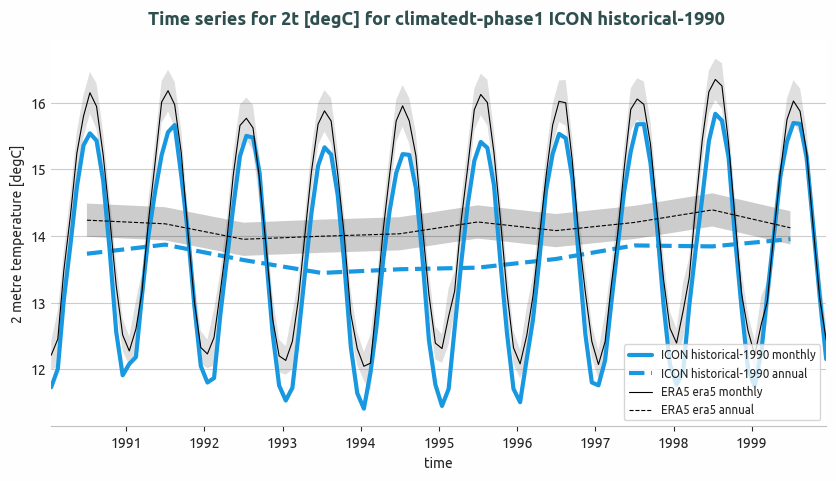

In [22]:
plot = PlotTimeseries(**plot_dict)
data_labels = plot.set_data_labels()
ref_labels = plot.set_ref_label()
desc = plot.set_description()
title = plot.set_title(var=run_dict['var'], units=run_dict['units'])
fig, _ = plot.plot_timeseries(data_labels=data_labels, ref_label=ref_labels, title=title)
plot.save_plot(fig=fig, var=run_dict['var'], description=desc)